In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, auc, accuracy_score,  classification_report, precision_recall_curve, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.calibration import calibration_curve

In [ ]:
df_native = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/Native_Data/SISSIz_Excel/native.xlsx"))
df_sissiz_mono = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/Native_Data/SISSIz_Excel/sissiz_mono.xlsx"))
df_sissiz_di = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/Native_Data/SISSIz_Excel/sissiz_di.xlsx"))
df_multiperm_mono = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/Native_Data/SISSIz_Excel/multiperm_mono.xlsx"))
df_multiperm_di = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/Native_Data/SISSIz_Excel/multiperm_di.xlsx"))
df_aln_shuffle = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/Native_Data/SISSIz_Excel/alifoldz.xlsx"))

In [ ]:
df_native.head(10)

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments.,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7. 8. and 9.,File
0,0.7518,0.7518,0.0077,0.4948,0.4483,-54.21,-21.97,8.08,-3.99,RepA_Fang_Fig5.txt
1,0.7986,0.7932,0.0203,0.7918,0.5198,-6.35,-0.66,1.15,-4.94,RF02162.txt
2,0.8038,0.8054,0.0064,0.5776,0.4483,-62.97,-37.99,10.91,-2.29,XIST_A.S0.txt
3,0.8038,0.8054,0.0064,0.5776,0.4483,-62.97,-37.99,10.91,-2.29,XIST_A.S1.txt
4,0.8038,0.8054,0.0064,0.5776,0.4483,-62.97,-37.99,10.91,-2.29,XIST_A.S2.txt
5,0.8038,0.8054,0.0064,0.5776,0.4483,-62.97,-37.99,10.91,-2.29,XIST_A.S3.txt
6,0.8544,0.8476,0.0211,0.8780,0.4357,-4.75,-1.17,1.61,-2.22,XIST_A.txt


In [ ]:
df_native[['Mean Pairwise Identity (MPI) of the input alignment',
        'Average MPI of the sampled alignments.',
        'Standard deviation of the MPIs of the sampled alignments',
        'Structural Conservation Index (SCI)',	
        'GC-Content',
        'RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.',
        'Average consensus MFE in the sampled alignments',
        'Standard deviation of the consensus MFE in the sampled alignments',
        'z-score calculated from 7. 8. and 9.']].describe()

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments.,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7. 8. and 9.
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,0.802857,0.802029,0.010671,0.639286,0.456714,-45.312857,-25.108571,7.782857,-2.901429
std,0.029679,0.028057,0.006871,0.139249,0.028212,27.354791,17.532652,4.496357,1.103063
min,0.751800,0.751800,0.006400,0.494800,0.435700,-62.970000,-37.990000,1.150000,-4.940000
25%,0.801200,0.799300,0.006400,0.577600,0.448300,-62.970000,-37.990000,4.845000,-3.140000
50%,0.803800,0.805400,0.006400,0.577600,0.448300,-62.970000,-37.990000,10.910000,-2.290000
75%,0.803800,0.805400,0.014000,0.684700,0.448300,-30.280000,-11.570000,10.910000,-2.290000
max,0.854400,0.847600,0.021100,0.878000,0.519800,-4.750000,-0.660000,10.910000,-2.220000


In [30]:
df_sissiz_mono.head(10)

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments.,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7. 8. and 9.,File
0,0.7489,0.7476,0.0060,0.1978,0.4097,-17.52,-13.39,4.98,-0.83,neg_sample_SISSIz_mono_RepA_Fang_Fig5.txt
1,0.8146,0.8046,0.0186,-0.0000,0.6016,0.00,-0.45,0.93,0.48,neg_sample_SISSIz_mono_RF02162.txt
2,0.7980,0.7945,0.0058,0.2673,0.4586,-23.99,-22.84,6.51,-0.18,neg_sample_SISSIz_mono_XIST_A.S0.txt
3,0.7974,0.7946,0.0056,0.3092,0.4753,-32.37,-29.04,8.32,-0.40,neg_sample_SISSIz_mono_XIST_A.S1.txt
4,0.8047,0.8016,0.0057,0.2482,0.4734,-25.66,-26.71,6.23,0.17,neg_sample_SISSIz_mono_XIST_A.S2.txt
5,0.8047,0.8016,0.0057,0.2482,0.4734,-25.66,-26.71,6.23,0.17,neg_sample_SISSIz_mono_XIST_A.S3.txt
6,0.8545,0.8531,0.0198,0.4400,0.4608,-1.76,-1.42,1.57,-0.22,neg_sample_SISSIz_mono_XIST_A.txt


In [31]:
df_sissiz_mono[['Mean Pairwise Identity (MPI) of the input alignment',
        'Average MPI of the sampled alignments.',
        'Standard deviation of the MPIs of the sampled alignments',
        'Structural Conservation Index (SCI)',	
        'GC-Content',
        'RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.',
        'Average consensus MFE in the sampled alignments',
        'Standard deviation of the consensus MFE in the sampled alignments',
        'z-score calculated from 7. 8. and 9.']].describe()


# Example neg_sample_SISSIz_mono_output_60_175.txt
# z-score = (RNAalifold consensus Minimum Free Energy (MFE) of the original alignment - Average consensus MFE in the sampled alignments) / Standard deviation of the consensus MFE in the sampled alignments
# z-score = (-7.27 - -9.87) / 4.02 = 0,65

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments.,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7. 8. and 9.
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,0.803257,0.799657,0.009600,0.244386,0.478971,-18.137143,-17.222857,4.967143,-0.115714
std,0.031025,0.030687,0.006568,0.132234,0.058676,12.566918,12.226738,2.727971,0.432853
min,0.748900,0.747600,0.005600,-0.000000,0.409700,-32.370000,-29.040000,0.930000,-0.830000
25%,0.797700,0.794550,0.005700,0.223000,0.459700,-25.660000,-26.710000,3.275000,-0.310000
50%,0.804700,0.801600,0.005800,0.248200,0.473400,-23.990000,-22.840000,6.230000,-0.180000
75%,0.809650,0.803100,0.012300,0.288250,0.474350,-9.640000,-7.405000,6.370000,0.170000
max,0.854500,0.853100,0.019800,0.440000,0.601600,0.000000,-0.450000,8.320000,0.480000


In [32]:
df_sissiz_di.head(10)

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments.,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7. 8. and 9.,File
0,0.7522,0.7568,0.0060,0.2728,0.4497,-29.38,-22.83,8.30,-0.79,neg_sample_SISSIz_di_RepA_Fang_Fig5.txt
1,0.7774,0.7839,0.0211,-0.0000,0.4647,0.00,-0.17,0.50,0.33,neg_sample_SISSIz_di_RF02162.txt
2,0.7996,0.8022,0.0063,0.3616,0.4623,-41.48,-33.83,9.69,-0.79,neg_sample_SISSIz_di_XIST_A.S0.txt
3,0.7996,0.8022,0.0063,0.3616,0.4623,-41.48,-33.83,9.69,-0.79,neg_sample_SISSIz_di_XIST_A.S1.txt
4,0.8065,0.8079,0.0061,0.3604,0.5060,-41.05,-36.15,9.26,-0.53,neg_sample_SISSIz_di_XIST_A.S2.txt
5,0.7902,0.7920,0.0060,0.2655,0.4743,-33.16,-37.12,9.37,0.42,neg_sample_SISSIz_di_XIST_A.S3.txt
6,0.8448,0.8491,0.0232,0.0498,0.3699,-0.10,-0.53,1.09,0.39,neg_sample_SISSIz_di_XIST_A.txt


In [33]:
df_sissiz_di[['Mean Pairwise Identity (MPI) of the input alignment',
        'Average MPI of the sampled alignments.',
        'Standard deviation of the MPIs of the sampled alignments',
        'Structural Conservation Index (SCI)',	
        'GC-Content',
        'RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.',
        'Average consensus MFE in the sampled alignments',
        'Standard deviation of the consensus MFE in the sampled alignments',
        'z-score calculated from 7. 8. and 9.']].describe()

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments.,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7. 8. and 9.
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,0.795757,0.799157,0.010714,0.238814,0.455600,-26.664286,-23.494286,6.842857,-0.251429
std,0.028329,0.027891,0.007837,0.152513,0.041717,18.762438,16.488901,4.161169,0.598343
min,0.752200,0.756800,0.006000,-0.000000,0.369900,-41.480000,-37.120000,0.500000,-0.790000
25%,0.783800,0.787950,0.006050,0.157650,0.456000,-41.265000,-34.990000,4.695000,-0.790000
50%,0.799600,0.802200,0.006300,0.272800,0.462300,-33.160000,-33.830000,9.260000,-0.530000
75%,0.803050,0.805050,0.013700,0.361000,0.469500,-14.740000,-11.680000,9.530000,0.360000
max,0.844800,0.849100,0.023200,0.361600,0.506000,0.000000,-0.170000,9.690000,0.420000


In [34]:
df_multiperm_mono.head(10)

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments.,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7. 8. and 9.,File
0,0.5657,0.5771,0.0063,0.0605,0.6426,-9.63,-1.37,1.62,-5.11,neg_sample_MULTIPERM_mono_RepA_Fang_Fig5.txt
1,0.6366,0.6430,0.0183,-0.0000,0.6902,0.00,-0.00,0.02,0.10,neg_sample_MULTIPERM_mono_RF02162.txt
2,0.8016,0.8040,0.0068,0.3880,0.4483,-41.34,-15.74,6.10,-4.20,neg_sample_MULTIPERM_mono_XIST_A.S0.txt
3,0.8016,0.8028,0.0071,0.3944,0.4483,-41.72,-15.39,6.43,-4.09,neg_sample_MULTIPERM_mono_XIST_A.S1.txt
4,0.8016,0.8057,0.0069,0.3474,0.4483,-36.81,-11.75,4.59,-5.46,neg_sample_MULTIPERM_mono_XIST_A.S2.txt
5,0.8016,0.8046,0.0083,0.3475,0.4483,-35.57,-12.42,5.80,-3.99,neg_sample_MULTIPERM_mono_XIST_A.S3.txt
6,0.8399,0.8353,0.0247,-0.0000,0.4357,0.00,-0.37,0.85,0.43,neg_sample_MULTIPERM_mono_XIST_A.txt


In [35]:
df_multiperm_mono[['Mean Pairwise Identity (MPI) of the input alignment',
        'Average MPI of the sampled alignments.',
        'Standard deviation of the MPIs of the sampled alignments',
        'Structural Conservation Index (SCI)',	
        'GC-Content',
        'RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.',
        'Average consensus MFE in the sampled alignments',
        'Standard deviation of the consensus MFE in the sampled alignments',
        'z-score calculated from 7. 8. and 9.']].describe()

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments.,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7. 8. and 9.
count,7.000000,7.000000,7.00000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,0.749800,0.753214,0.01120,0.219686,0.508814,-23.581429,-8.148571,3.630000,-3.188571
std,0.104529,0.100279,0.00730,0.188576,0.108622,19.450388,7.235766,2.719436,2.423423
min,0.565700,0.577100,0.00630,-0.000000,0.435700,-41.720000,-15.740000,0.020000,-5.460000
25%,0.719100,0.722900,0.00685,0.030250,0.448300,-39.075000,-13.905000,1.235000,-4.655000
50%,0.801600,0.804000,0.00710,0.347400,0.448300,-35.570000,-11.750000,4.590000,-4.090000
75%,0.801600,0.805150,0.01330,0.367750,0.545450,-4.815000,-0.870000,5.950000,-1.945000
max,0.839900,0.835300,0.02470,0.394400,0.690200,0.000000,-0.000000,6.430000,0.430000


In [36]:
df_multiperm_di.head(10)

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments.,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7. 8. and 9.,File
0,0.5679,0.5779,0.0062,0.1856,0.6455,-29.59,-7.33,3.77,-5.90,neg_sample_MULTIPERM_di_RepA_Fang_Fig5.txt
1,0.6283,0.6363,0.0137,-0.0000,0.6799,0.00,-0.06,0.24,0.27,neg_sample_MULTIPERM_di_RF02162.txt
2,0.8016,0.8022,0.0073,0.5365,0.4483,-58.14,-36.62,8.74,-2.46,neg_sample_MULTIPERM_di_XIST_A.S0.txt
3,0.8016,0.8017,0.0073,0.5926,0.4483,-62.78,-37.61,8.78,-2.87,neg_sample_MULTIPERM_di_XIST_A.S1.txt
4,0.8016,0.8013,0.0067,0.5445,0.4483,-57.02,-35.09,8.55,-2.56,neg_sample_MULTIPERM_di_XIST_A.S2.txt
5,0.8016,0.8026,0.0064,0.5264,0.4483,-56.15,-37.84,9.61,-1.91,neg_sample_MULTIPERM_di_XIST_A.S3.txt
6,0.8399,0.8266,0.0270,0.9176,0.4357,-6.46,-1.25,1.63,-3.20,neg_sample_MULTIPERM_di_XIST_A.txt


In [37]:
df_multiperm_di[['Mean Pairwise Identity (MPI) of the input alignment',
        'Average MPI of the sampled alignments.',
        'Standard deviation of the MPIs of the sampled alignments',
        'Structural Conservation Index (SCI)',	
        'GC-Content',
        'RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.',
        'Average consensus MFE in the sampled alignments',
        'Standard deviation of the consensus MFE in the sampled alignments',
        'z-score calculated from 7. 8. and 9.']].describe()

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments.,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7. 8. and 9.
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,0.748929,0.749800,0.010657,0.471886,0.507757,-38.591429,-22.257143,5.902857,-2.661429
std,0.105432,0.099339,0.007665,0.297290,0.106410,26.513839,18.286344,3.914757,1.827142
min,0.567900,0.577900,0.006200,-0.000000,0.435700,-62.780000,-37.840000,0.240000,-5.900000
25%,0.714950,0.718800,0.006550,0.356000,0.448300,-57.580000,-37.115000,2.700000,-3.035000
50%,0.801600,0.801700,0.007300,0.536500,0.448300,-56.150000,-35.090000,8.550000,-2.560000
75%,0.801600,0.802400,0.010500,0.568550,0.546900,-18.025000,-4.290000,8.760000,-2.185000
max,0.839900,0.826600,0.027000,0.917600,0.679900,0.000000,-0.060000,9.610000,0.270000


In [38]:
df_aln_shuffle.head(10)

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments.,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7. 8. and 9.,File
0,0.7518,0.7524,0.0072,0.3980,0.4483,-36.29,-15.10,5.99,-3.54,neg_sample_ALIFOLDz_RepA_Fang_Fig5.txt
1,0.7986,0.7901,0.0203,0.5385,0.5198,-4.40,-0.80,1.16,-3.10,neg_sample_ALIFOLDz_RF02162.txt
2,0.8038,0.8033,0.0066,0.4358,0.4483,-37.49,-27.51,7.95,-1.26,neg_sample_ALIFOLDz_XIST_A.S0.txt
3,0.8038,0.8032,0.0064,0.5471,0.4483,-50.83,-23.98,6.73,-3.99,neg_sample_ALIFOLDz_XIST_A.S1.txt
4,0.8038,0.8029,0.0062,0.4677,0.4483,-41.77,-26.07,7.18,-2.19,neg_sample_ALIFOLDz_XIST_A.S2.txt
5,0.8038,0.8024,0.0062,0.4163,0.4483,-39.01,-25.42,6.88,-1.97,neg_sample_ALIFOLDz_XIST_A.S3.txt


In [39]:
df_aln_shuffle[['Mean Pairwise Identity (MPI) of the input alignment',
        'Average MPI of the sampled alignments.',
        'Standard deviation of the MPIs of the sampled alignments',
        'Structural Conservation Index (SCI)',	
        'GC-Content',
        'RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.',
        'Average consensus MFE in the sampled alignments',
        'Standard deviation of the consensus MFE in the sampled alignments',
        'z-score calculated from 7. 8. and 9.']].describe()

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments.,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7. 8. and 9.
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,0.794267,0.792383,0.008817,0.467233,0.460217,-34.965000,-19.813333,5.981667,-2.675000
std,0.020908,0.020253,0.005638,0.062982,0.029190,15.853824,10.304395,2.446462,1.038513
min,0.751800,0.752400,0.006200,0.398000,0.448300,-50.830000,-27.510000,1.160000,-3.990000
25%,0.799900,0.793175,0.006250,0.421175,0.448300,-41.080000,-25.907500,6.175000,-3.430000
50%,0.803800,0.802650,0.006500,0.451750,0.448300,-38.250000,-24.700000,6.805000,-2.645000
75%,0.803800,0.803125,0.007050,0.520800,0.448300,-36.590000,-17.320000,7.105000,-2.025000
max,0.803800,0.803300,0.020300,0.547100,0.519800,-4.400000,-0.800000,7.950000,-1.260000


## Mean Pairwise Identity (MPI) of the input alignment

C:\Users\Stefan\AppData\Local\Temp\ipykernel_11520\1437701190.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


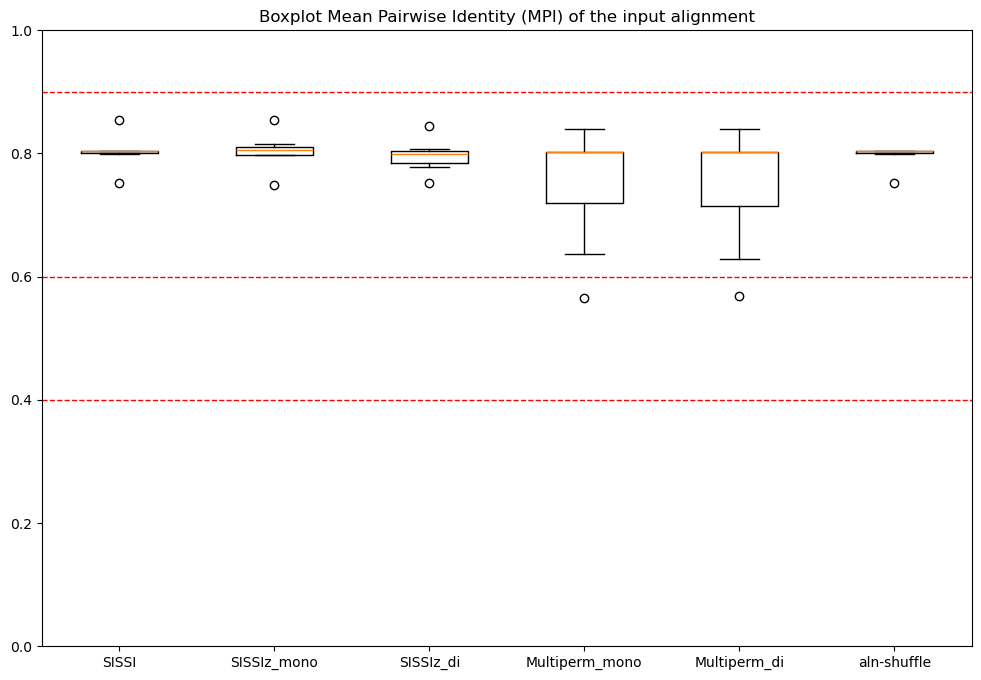

In [ ]:
dataframes = [df_native, df_sissiz_mono, df_sissiz_di, df_multiperm_mono, df_multiperm_di, df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
data = [df['Mean Pairwise Identity (MPI) of the input alignment'] for df in dataframes]
thresholds = [0.40, 0.60, 0.90]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1, label=f'Threshold {t}')

plt.ylim(0.0, 1.0)
plt.title('Boxplot Mean Pairwise Identity (MPI) of the input alignment')
plt.show()

## Average MPI of the sampled alignments.

C:\Users\Stefan\AppData\Local\Temp\ipykernel_11520\1318570128.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


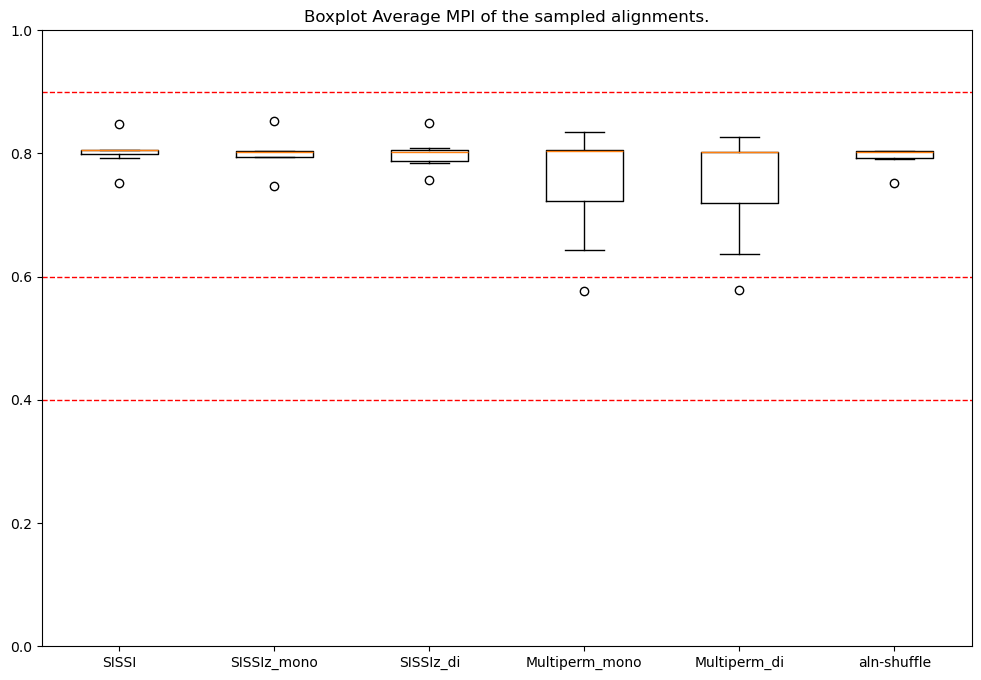

In [ ]:
dataframes = [df_native, df_sissiz_mono, df_sissiz_di, df_multiperm_mono, df_multiperm_di, df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
data = [df['Average MPI of the sampled alignments.'] for df in dataframes]
thresholds = [0.40, 0.60, 0.90]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1, label=f'Threshold {t}')

plt.ylim(0.0, 1.0)
plt.title('Boxplot Average MPI of the sampled alignments.')
plt.show()

## Standard deviation of the MPIs of the sampled alignments

C:\Users\Stefan\AppData\Local\Temp\ipykernel_11520\4121038437.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


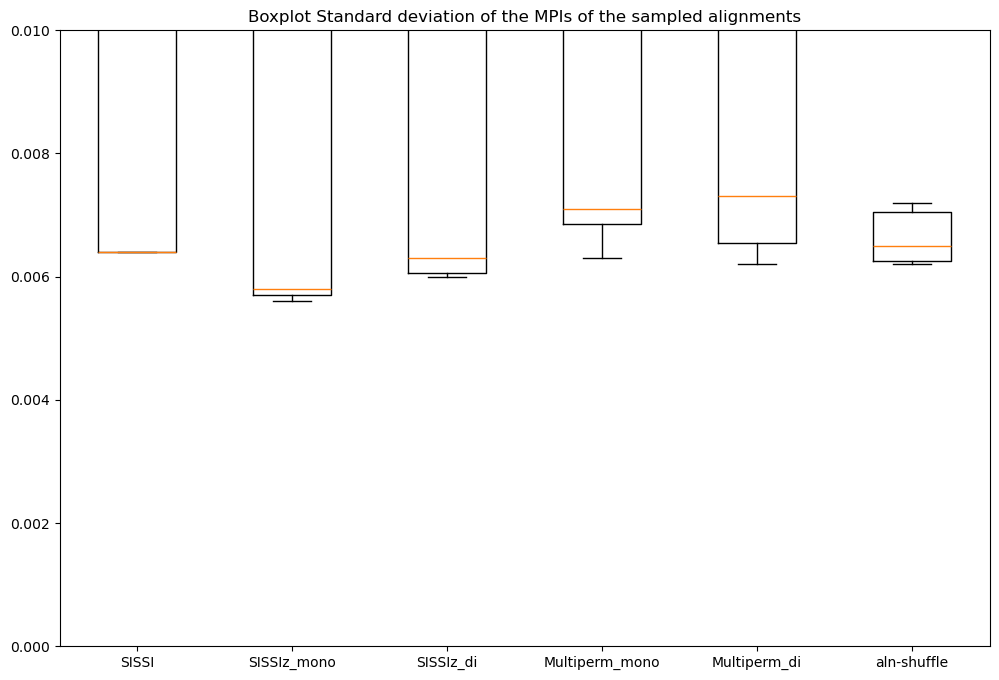

In [ ]:
dataframes = [df_native, df_sissiz_mono, df_sissiz_di, df_multiperm_mono, df_multiperm_di, df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
data = [df['Standard deviation of the MPIs of the sampled alignments'] for df in dataframes]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1, label=f'Threshold {t}')

plt.ylim(0.0, 0.01)
plt.title('Boxplot Standard deviation of the MPIs of the sampled alignments')
plt.show()

## Structural Conservation Index (SCI)

C:\Users\Stefan\AppData\Local\Temp\ipykernel_11520\1306523587.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


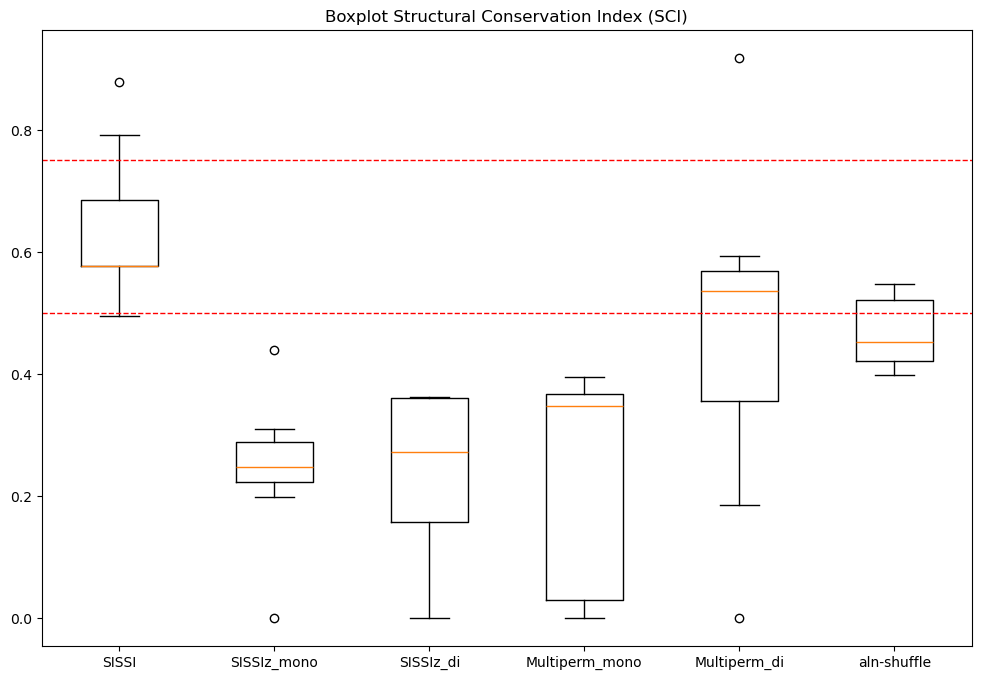

In [ ]:
dataframes = [df_native, df_sissiz_mono, df_sissiz_di, df_multiperm_mono, df_multiperm_di, df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
data = [df['Structural Conservation Index (SCI)'] for df in dataframes]
thresholds = [0.5, 0.75]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1, label=f'Threshold {t}')

plt.title('Boxplot Structural Conservation Index (SCI)')
plt.show()

## GC-Content

C:\Users\Stefan\AppData\Local\Temp\ipykernel_11520\3074007515.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


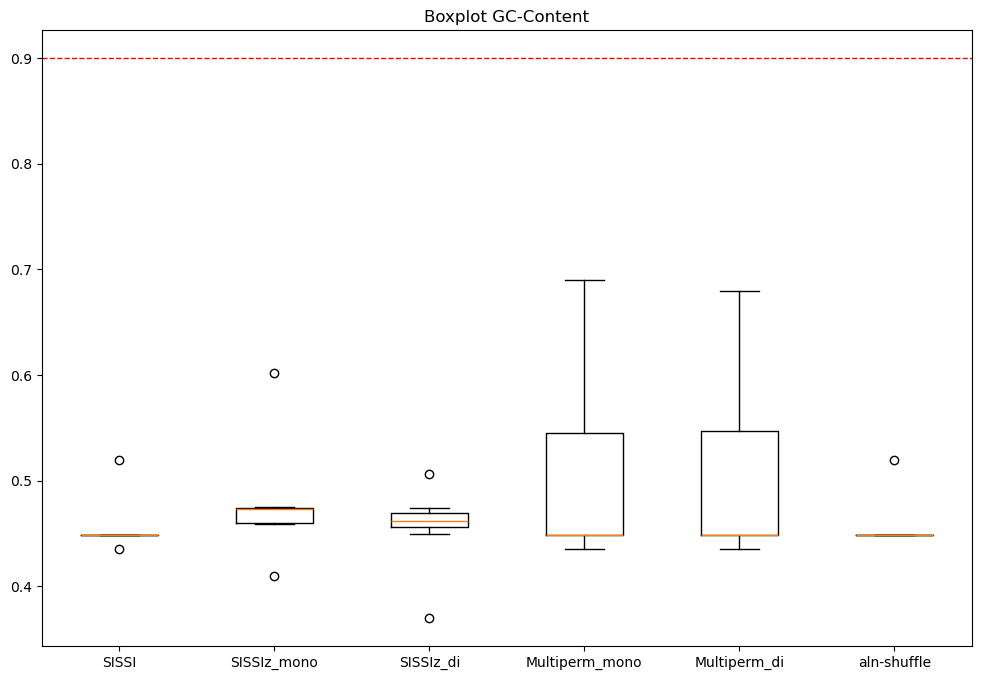

In [ ]:
dataframes = [df_native, df_sissiz_mono, df_sissiz_di, df_multiperm_mono, df_multiperm_di, df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
data = [df['GC-Content'] for df in dataframes]
thresholds = [0.9]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1, label=f'Threshold {t}')

plt.title('Boxplot GC-Content')
plt.show()

## RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.

C:\Users\Stefan\AppData\Local\Temp\ipykernel_11520\45866791.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


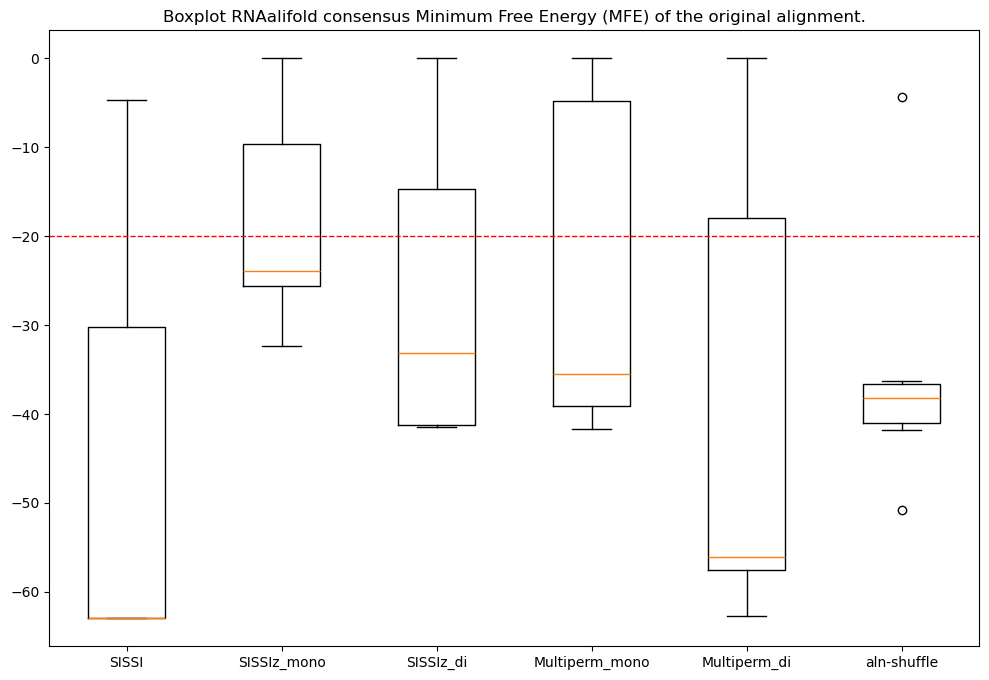

In [ ]:
dataframes = [df_native, df_sissiz_mono, df_sissiz_di, df_multiperm_mono, df_multiperm_di, df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
data = [df['RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.'] for df in dataframes]
thresholds = [-20]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1, label=f'Threshold {t}')

plt.title('Boxplot RNAalifold consensus Minimum Free Energy (MFE) of the original alignment.')
plt.show()

## Average consensus MFE in the sampled alignments

C:\Users\Stefan\AppData\Local\Temp\ipykernel_11520\2536993985.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


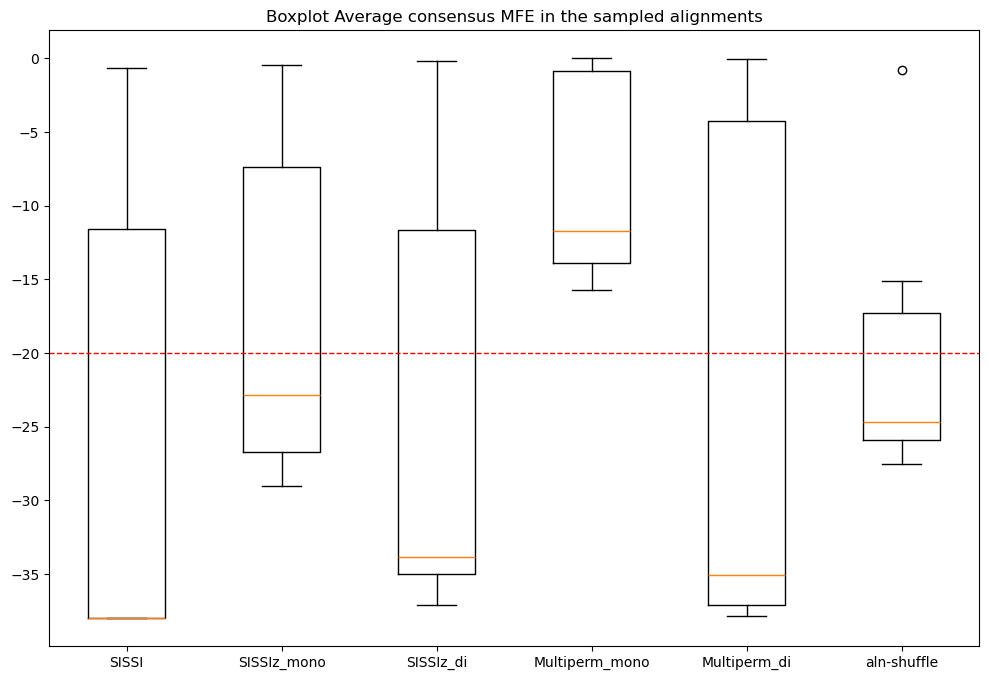

In [ ]:
dataframes = [df_native, df_sissiz_mono, df_sissiz_di, df_multiperm_mono, df_multiperm_di, df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
data = [df['Average consensus MFE in the sampled alignments'] for df in dataframes]
thresholds = [-20]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1, label=f'Threshold {t}')

plt.title('Boxplot Average consensus MFE in the sampled alignments')
plt.show()

## Standard deviation of the consensus MFE in the sampled alignments

C:\Users\Stefan\AppData\Local\Temp\ipykernel_11520\3641649075.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


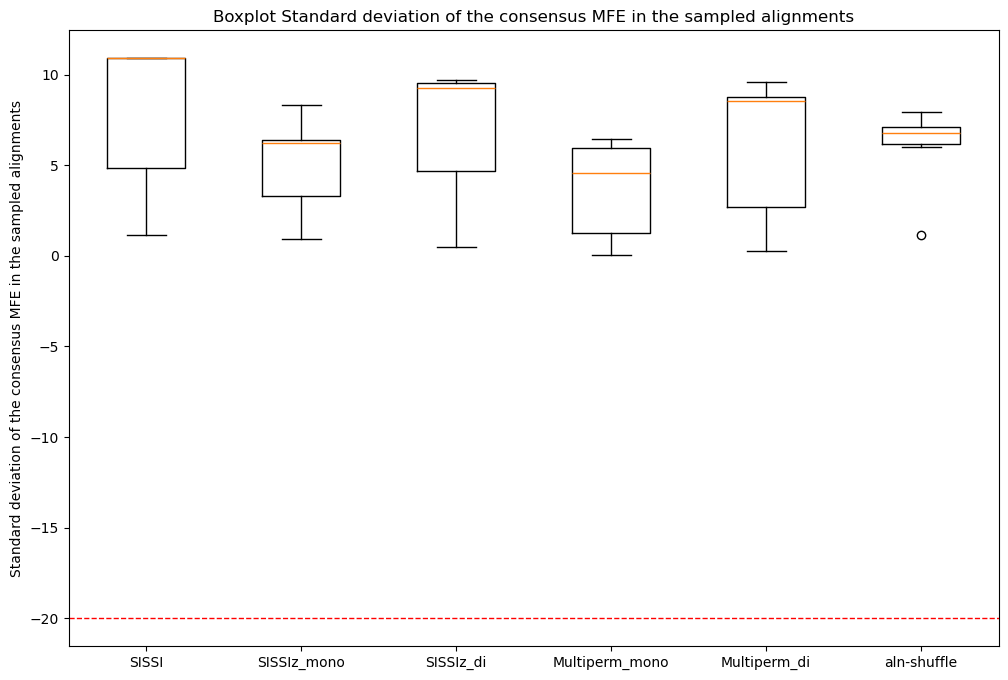

In [ ]:
dataframes = [df_native, df_sissiz_mono, df_sissiz_di, df_multiperm_mono, df_multiperm_di, df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
data = [df['Standard deviation of the consensus MFE in the sampled alignments'] for df in dataframes]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1, label=f'Threshold {t}')

plt.title('Boxplot Standard deviation of the consensus MFE in the sampled alignments')
plt.ylabel('Standard deviation of the consensus MFE in the sampled alignments')
plt.show()

## z-score 

C:\Users\Stefan\AppData\Local\Temp\ipykernel_11520\2957777788.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)
C:\Users\Stefan\AppData\Local\Temp\ipykernel_11520\2957777788.py:12: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
C:\Users\Stefan\AppData\Local\Temp\ipykernel_11520\2957777788.py:13: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
C:\Users\Stefan\AppData\Local\Temp\ipykernel_11520\2957777788.py:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(3.5, 6.5, color="mediumpurpl

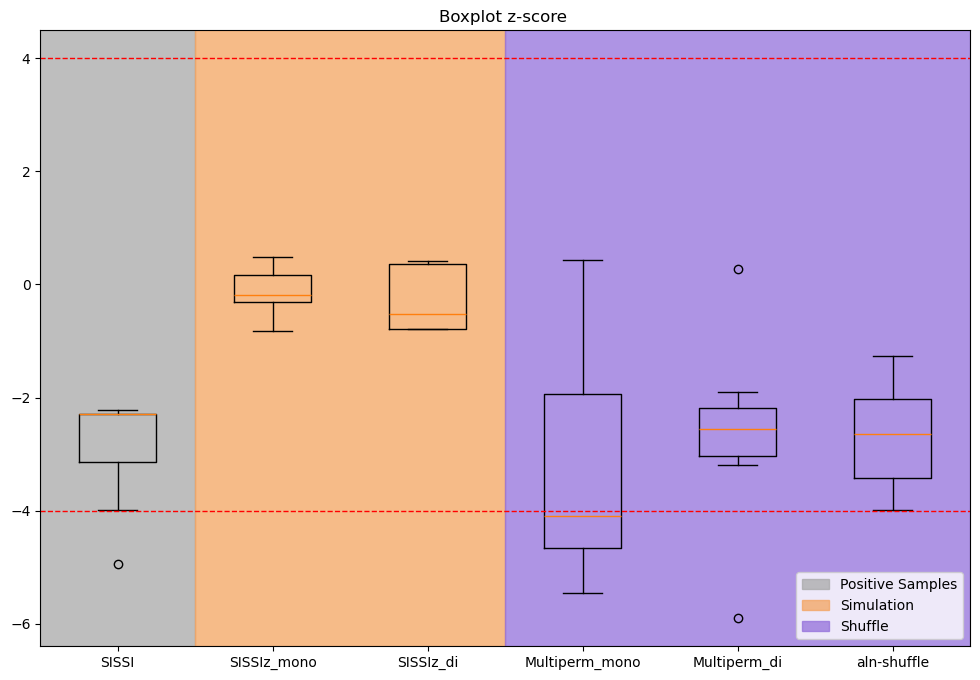

In [ ]:
dataframes = [df_native, df_sissiz_mono, df_sissiz_di, df_multiperm_mono, df_multiperm_di, df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
data = [df['z-score calculated from 7. 8. and 9.'] for df in dataframes]
thresholds = [-4, 4]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1)

plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')

plt.title('Boxplot z-score ')
plt.legend()
plt.show()